In [2]:
pip install opencv-python



SyntaxError: invalid syntax (556306433.py, line 1)

Changement fréquence - 4 circles par vidéo

In [3]:
import cv2
import numpy as np

# Définir les dimensions de l'image et le nombre de frames
width = 1000
height = 1000
num_frames = 150

# Créer un tableau vide pour stocker les frames
frames = []

freq=[1/15,1/30,1/60,1/120]

def create_circle_video_diff_freq(width,height,num_frames,list_freq):
    # Boucle sur les frames
    for i in range(num_frames):
        img = np.zeros((height, width), dtype=np.uint8)
        for j in range(len(list_freq)):
        # Créer une image noire
                        # Définir le rayon du cercle pour cette frame
            t = i ##% 30  # temps écoulé depuis le début de l'oscillation (entre 0 et 30)
            r = 100 + 2* np.sin(t *list_freq[j] * np.pi * 2)  # rayon oscillant entre 99 et 101
            ##print(r)
            # Ajouter le texte en dessous du cercle
            font = cv2.FONT_HERSHEY_SIMPLEX
            text = f"Frequency : {freq[j]*30} Hz"
            textsize = cv2.getTextSize(text, font, 0.5, 1)[0]
            radius = int(r)
            if (j ==0):
                cv2.circle(img, (width // 4, height // 4), radius, 255, -1)
                cv2.putText(img, text, (width // 4 , height // 4*2), font, 0.5, 255, 1)
            if (j == 1):
                cv2.circle(img, (width // 4*3, height // 4), radius, 255, -1)
                cv2.putText(img, text, (width // 4*2, height // 4*2), font, 0.5, 255, 1)
            if (j == 2):
                cv2.circle(img, (width // 4, height // 4*3), radius, 255, -1)
                cv2.putText(img, text, ((width - textsize[0]) // 3, height -20), font, 0.5, 255, 1)
            if (j == 3):
                cv2.circle(img, (width // 4*3, height // 4*3), radius, 255, -1)
                cv2.putText(img, text, (width - textsize[0] -20, height -20), font, 0.5, 255, 1)
                    # Ajouter du bruit à l'image
        


            # Dessiner le cercle sur l'image
            ##print(img)
        noise = np.random.normal(0, 2, (height, width)).astype(np.uint8)
        img = cv2.add(img, noise)    # Ajouter l'image à la liste des frames
        frames.append(img)

    # Enregistrer les frames en tant que vidéo
    out = cv2.VideoWriter('oscillating_circle.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, (width, height),0)
    for frame in frames:
        out.write(frame)
    out.release()





Changement amplitude- 4 circles par vidéo

In [34]:
import cv2
import numpy as np

# Définir les dimensions de l'image et le nombre de frames
width = 1000
height = 1000
num_frames = 150

# Créer un tableau vide pour stocker les frames
frames = []

ampl=[0.2,0.4,0.6,0.8,1]


    
# Boucle sur les frames
for i in range(num_frames):
    img = np.zeros((height, width), dtype=np.uint8)
    for j in range(len(freq)):
    # Créer une image noire
        
        ##print(freq[j])
        # Définir le rayon du cercle pour cette frame
        t = i % 30  # temps écoulé depuis le début de l'oscillation (entre 0 et 30)
        r = 100 + ampl[j] * np.sin(t *30 * np.pi * 2)  # rayon oscillant entre 99 et 101
        radius = int(r)
        if (j ==0):
            cv2.circle(img, (width // 4, height // 4), radius, 255, -1)
        if (j == 1):
            cv2.circle(img, (width // 4*3, height // 4), radius, 255, -1)
        if (j == 2):
            cv2.circle(img, (width // 4, height // 4*3), radius, 255, -1)
        if (j == 3):
            cv2.circle(img, (width // 4*3, height // 4*3), radius, 255, -1)

        # Dessiner le cercle sur l'image
        ##print(img)
        # Ajouter l'image à la liste des frames
    frames.append(img)

# Enregistrer les frames en tant que vidéo
out = cv2.VideoWriter('oscillating_circle_ampl.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, (width, height),0)
for frame in frames:
    out.write(frame)
out.release()

Vidéo pour cercle avec bruit :

In [15]:
import cv2
import numpy as np
from moviepy.editor import VideoFileClip

# Définir les dimensions de l'image et le nombre de frames
##width = 1000
##height = 1000 
# hauteur augmentée pour ajouter le texte en dessous du cercle
##num_frames = 150

# Créer un tableau vide pour stocker les frames


def create_circle_video_noise(width,height,num_frames,amplitude,add_noise,freq):
    frames = []
    # Boucle sur les frames
    for i in range(num_frames):
        # Créer une image noire
        img = np.zeros((height, width), dtype=np.uint8)
            # Définir le rayon du cercle pour cette frame
        t = i / 60  # temps écoulé depuis le début de l'oscillation (entre 0 et 23)
        ##print(t)
        ##r = 200 +  14* np.sin(t / 30 * np.pi * 2)  # rayon oscillant entre 50 et 150
        r = 100 +  amplitude* np.sin(t*freq * np.pi * 2)
        radius = int(r)
        ##radius = r
        ##print(radius,i,np.sin(t*freq * np.pi * 2))

        # Dessiner le cercle sur l'image
        cv2.circle(img, (width // 2, height // 2), radius, 255, -1)
        
        ##print( radius,img[500].sum())
        # Ajouter du bruit à l'image
        if (add_noise):
            noise = np.random.normal(0, 10, (height, width)).astype(np.uint8)
            img = cv2.add(img, noise)  

        # Ajouter le texte en dessous du cercle
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = "Fréquence : {} Hz".format(freq)
        textsize = cv2.getTextSize(text, font, 0.5, 1)[0]
        textx = (width - textsize[0]) // 2
        texty = height - 20
        cv2.putText(img, text, (textx, texty), font, 0.5, 255, 1)
        # Ajouter l'image à la liste des frames
        ###img = cv2.resize(img, (int(width/4), int(height/4)))


        frames.append(img)

    # Enregistrer les frames en tant que vidéo
    out = cv2.VideoWriter('oscillating_circle_{}hz_{}px_60fps_rad_100.mp4'.format(freq, amplitude), cv2.VideoWriter_fourcc(*'DIVX'), 60, (int(width), int(height)),0)
    for frame in frames:
        out.write(frame)
    
    out.release()

    ##clip = VideoFileClip("oscillating_circle_{}hz_{}px.mp4".format(freq, amplitude))
    ##clip_resized = clip.resize(height=360)
    ##clip_resized.write_videofile("oscillating_circle_{}hz_{}px.mp4".format(freq, amplitude))



In [16]:
##for i in range(10):
create_circle_video_noise(1080,1080,150,2,True,1)
create_circle_video_noise(1080,1080,150,2,True,10)
create_circle_video_noise(1080,1080,150,2,True,20)
create_circle_video_noise(1080,1080,150,2,True,30)
create_circle_video_noise(1080,1080,150,2,True,40)
create_circle_video_noise(1080,1080,150,2,True,50)
#create_circle_video_noise(1000,1000,150,10,True,2)
#create_circle_video_noise(4000,4000,150,2,True,70)
#create_circle_video_noise(4000,4000,150,2,True,80)


Calcul l'amplitude des variations

150.0
3.0


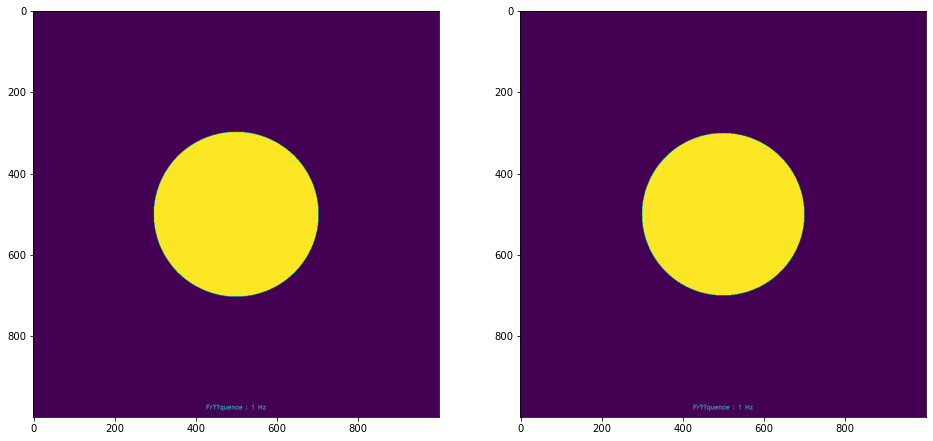

In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

width = 1000
height = 1000 

# Ouvrir les vidéos
vid1 = cv2.VideoCapture('oscillating_circle_1hz_4px.avi')
##vid2 = cv2.VideoCapture('oscillating_circle_entree.avi')
print(vid1.get(cv2.CAP_PROP_FRAME_COUNT))


# Se déplacer à l'image 30 dans chaque vidéo
vid1.set(cv2.CAP_PROP_POS_FRAMES, 7)

# Lire l'image 30 de chaque vidéo
ret1, frame1 = vid1.read()
vid1.release()


vid2 = cv2.VideoCapture('oscillating_circle_1hz_4px.avi')

# Se déplacer à l'image 45 dans chaque vidéo
vid2.set(cv2.CAP_PROP_POS_FRAMES, 15)
##vid2.set(cv2.CAP_PROP_POS_FRAMES, 45)

# Lire l'image 45 de chaque vidéo
ret1, frame3 = vid2.read()
##ret2, frame4 = vid2.read()



frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY) 
frame1 = frame1/frame1.max()+0.1
# Convertir les valeurs de pixel en entiers
frame1_int = frame1.astype(np.int32)


frame3 = cv2.cvtColor(frame3, cv2.COLOR_BGR2GRAY)
    # Convertir les valeurs de pixel en entiers
frame3 = frame3/frame3.max()+0.1

frame3_int = frame3.astype(np.int32)
# Calculer la différence de pixels entre les images 30 et 45 de chaque vidéo
img1 = np.zeros((height, width))
cv2.circle(img1, (width // 2, height // 2), 204, 255, -1)
img2 = np.zeros((height, width))
cv2.circle(img2, (width // 2, height // 2), 196, 255, -1)
img1=img1/255
img2=img2/255
diff1 = cv2.absdiff(frame1_int, img1.astype(np.int32))
diff2 = cv2.absdiff(frame3_int, img2.astype(np.int32))
diff3= cv2.absdiff(frame3_int, frame1_int)
##print(diff3.sum())
##print(img1)
##print(frame1_int.max())
plt.figure(1, figsize=(16,20))

plt.subplot(1,2,1)
plt.imshow(frame1_int)
##plt.imshow( img1.astype(np.int32))
plt.subplot(1,2,2)

plt.imshow(frame3_int)

dif1 = frame1_int[500].sum() - frame3_int[500].sum()
print(dif1/2)
##print(frame3_int.sum())

# Enregistrer les images de différence dans des fichiers séparés
cv2.imwrite('diff1.png', diff1)
cv2.imwrite('diff2.png', diff2)
cv2.imwrite('frame1.png', frame1)
cv2.imwrite('frame2.png', frame3)


# Fermer les vidéos
vid2.release()


Calcul l'amplitude des variations- version mieux

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

width = 1000
height = 1000 

def compute_circle_amplification(amplified_video,original_freq,original_ampl):
    # Ouvrir les vidéos
    vid1 = cv2.VideoCapture(amplified_video)
    ##vid2 = cv2.VideoCapture('oscillating_circle_entree.avi')
    nbr_frame_per_second =vid1.get(cv2.CAP_PROP_FRAME_COUNT)


    # Se déplacer à l'image f1 dans chaque vidéo
    vid1.set(cv2.CAP_PROP_POS_FRAMES, (nbr_frame_per_second/4)/original_freq)

    # Lire l'image 30 de chaque vidéo
    ret1, frame1 = vid1.read()
    vid1.release()


    vid2 = cv2.VideoCapture(amplified_video)

    # Se déplacer à l'image 45 dans chaque vidéo
    vid2.set(cv2.CAP_PROP_POS_FRAMES, (nbr_frame_per_second/2)/original_freq)
    ##vid2.set(cv2.CAP_PROP_POS_FRAMES, 45)

    # Lire l'image 45 de chaque vidéo
    ret1, frame3 = vid2.read()
    ##ret2, frame4 = vid2.read()



    frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY) 
    frame1 = frame1/frame1.max()+0.1
    # Convertir les valeurs de pixel en entiers
    frame1_int = frame1.astype(np.int32)


    frame3 = cv2.cvtColor(frame3, cv2.COLOR_BGR2GRAY)
        # Convertir les valeurs de pixel en entiers
    frame3 = frame3/frame3.max()+0.1

    frame3_int = frame3.astype(np.int32)
    # Calculer la différence de pixels entre les images 30 et 45 de chaque vidéo
    img1 = np.zeros((height, width))
    cv2.circle(img1, (width // 2, height // 2), 200+original_ampl, 255, -1)
    img2 = np.zeros((height, width))
    cv2.circle(img2, (width // 2, height // 2), 200-original_ampl, 255, -1)
    img1=img1/255
    img2=img2/255
    diff1 = cv2.absdiff(frame1_int, img1.astype(np.int32))
    diff2 = cv2.absdiff(frame3_int, img2.astype(np.int32))
    diff3= cv2.absdiff(frame3_int, frame1_int)
    ##print(diff3.sum())
    ##print(img1)
    ##print(frame1_int.max())
    plt.figure(1, figsize=(16,20))

    plt.subplot(1,2,1)
    plt.imshow(frame1_int)
    ##plt.imshow( img1.astype(np.int32))
    plt.subplot(1,2,2)

    plt.imshow(frame3_int)

    dif1 = frame1_int[500].sum() - frame3_int[500].sum()
    print(dif1/2)
    ##print(frame3_int.sum())

    # Enregistrer les images de différence dans des fichiers séparés
    cv2.imwrite('diff1.png', diff1)
    cv2.imwrite('diff2.png', diff2)
    cv2.imwrite('frame1.png', frame1)
    cv2.imwrite('frame2.png', frame3)


    # Fermer les vidéos
    vid2.release()
    return dif1/2

Calcul l'efficacité de l'amplification

In [24]:
import cv2
import numpy as np


from skimage.metrics import structural_similarity as ssim


def compute_efficiency_algo(original_real_amplified,amplified_video_by_algo):
    # Ouvrir les vidéos
    video1 = cv2.VideoCapture(amplified_video_by_algo)
    video2 = cv2.VideoCapture(original_real_amplified)

    # Obtenir les dimensions de la vidéo
    width = int(video1.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video1.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video1.get(cv2.CAP_PROP_FPS))

    # Créer l'objet VideoWriter pour la sortie vidéo
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi', fourcc, fps, (width, height), False)
    list_dif=[]
    list_ssim=[]
    # Boucle sur les frames
    while True:
        # Lire les frames de chaque vidéo
        ret1, frame1 = video1.read()
        ret2, frame2 = video2.read()
        
        # Vérifier si la fin des vidéos est atteinte
        if not ret1 or not ret2:
            break
        frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY) 
        frame1 = frame1/frame1.max()+0.1
        frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY) 
        frame2 = frame2/frame2.max()+0.1
        # Convertir les valeurs de pixel en entiers
        frame1_int = frame1.astype(np.int32)
        frame2_int = frame2.astype(np.int32)
        
        # Calculer la différence des pixels entre les deux images
        diff = np.abs(frame1_int - frame2_int).sum()
        list_dif.append(diff)
        list_ssim.append(ssim(frame1_int,frame2_int,channel_axis=1))
        
        # Attendre une touche de clavier pour sortir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Libérer les ressources et fermer les fenêtres
    video1.release()
    video2.release()
    out.release()
    cv2.destroyAllWindows()
    print(sum(list_dif)/len(list_dif))
    print(sum(list_ssim)/len(list_ssim))
    return sum(list_dif)/len(list_dif),sum(list_ssim)/len(list_ssim)
